In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def get_array(files):
    labels, values = {}, {}
    for file in files:
        df = pd.read_csv(file)
        labels[file], values[file] = df.columns.tolist(), df.values
    
    return labels, values

In [20]:
def show_history(metrics='acc', average=False, *files):
    labels, values = get_array(files)
    colors = ["b", "g", "r", "c", "m", "y", "b", "w"]
    plt.figure(figsize=(12, 8))
    for i, key in enumerate(values.keys()):
        if average:
            for column in range(1, values[key].shape[1]):
                values[key][:, column] = np.convolve(values[key][:, column], np.ones(average)/float(average), 'same')
                values[key] = values[key][average//2:-((average//2)+1)]
        plt.plot(values[key][:, 0], values[key][:, labels[key].index(metrics)], colors[i], alpha=0.3, label=key[:-4]+' '+metrics)
        if 'val_'+metrics in labels[key]:
            plt.plot(values[key][:, 0], values[key][:, labels[key].index('val_'+metrics)], colors[i], alpha=0.9, label=key[:-4]+' '+'val_'+metrics)

    plt.title('History')
    plt.xlabel('Epochs')
    plt.ylabel(metrics)
    plt.xlim(-10, 210)
    plt.ylim(0, 6)
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.00), fontsize=12)
    plt.grid(color='gray', alpha=0.3)
    plt.show()

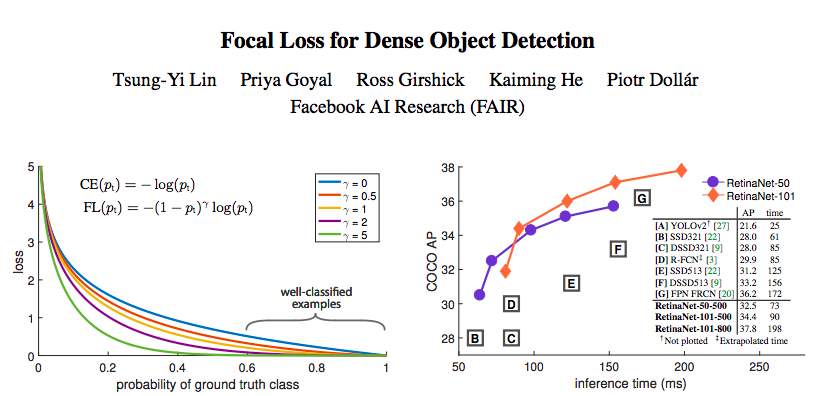

## Cross Entropy Loss

In [21]:
def cross_entropy_loss(y_true, y_pred):
    y_pred = tf.maximum(tf.minimum(y_pred, 1 - 1e-15), 1e-15)
    cross_entropy_loss = -tf.reduce_sum(y_true * tf.log(y_pred), axis=-1)
    return cross_entropy_loss

## Focal Loss

In [22]:
def focal_loss(y_true, y_pred):
    y_pred = tf.maximum(tf.minimum(y_pred, 1 - 1e-15), 1e-15)
    focal_loss = -tf.reduce_sum(tf.pow((1. - y_pred), 2) * (y_true * tf.log(y_pred)), axis=-1)
    return focal_loss

## α-balanced Focal Loss

In [23]:
def a_balanced_focal_loss(y_true, y_pred):
    y_pred = tf.maximum(tf.minimum(y_pred, 1 - 1e-15), 1e-15)
    a_balanced_focal_loss = -tf.reduce_sum(0.25 * (tf.pow((1. - y_pred), 2)) * (y_true * tf.log(y_pred)), axis=-1)
    return a_balanced_focal_loss

## Pattern

- normal:　通常のSSD
- focal:　Focal Loss(alpha=None, gamma=2)
- α_balanced_focal:　α_balanced Focal Loss(alpha=0.25, gamma=2)
- α_balanced_focal2:　α_balanced Focal Loss(alpha=0.3, gamma=2)
- α_balanced_focal3:　α_balanced Focal Loss(alpha=0.25, gamma=3)
- α_balanced_focal4:　α_balanced Focal Loss(alpha=0.2, gamma=2)

## Show

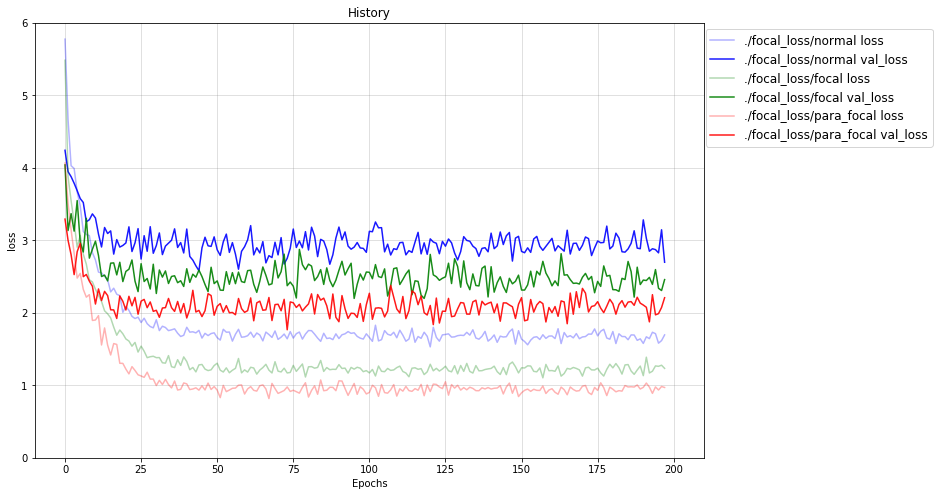

In [35]:
show_history('loss', 1,
             './focal_loss/normal.csv',
            './focal_loss/focal.csv',
             './focal_loss/para_focal.csv')
             #'./focal_loss/para_focal2.csv',
            #'./focal_loss/para_focal3.csv',
            #'./focal_loss/para_focal4.csv')